In [47]:
import cv2
import numpy as np
import dlib

在OpenCV中，色相（Hue）的取值介于0到180度之间，分别对应不同的颜色；明度取值介于0到255之间，0代表最低明度，255代表最高明度；纯度取值介于0到255之间，0代表最低纯度，255代表最高纯度。

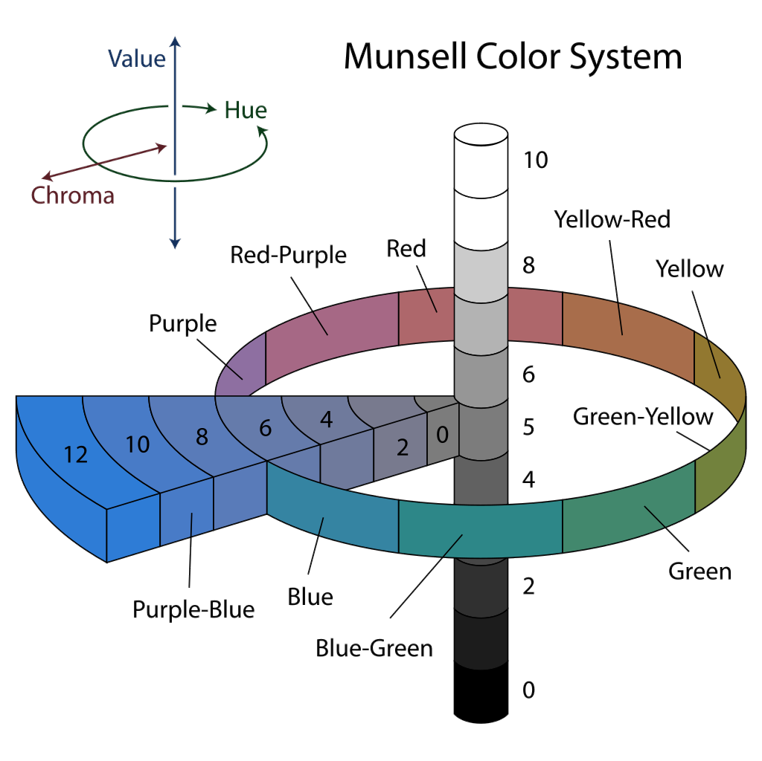

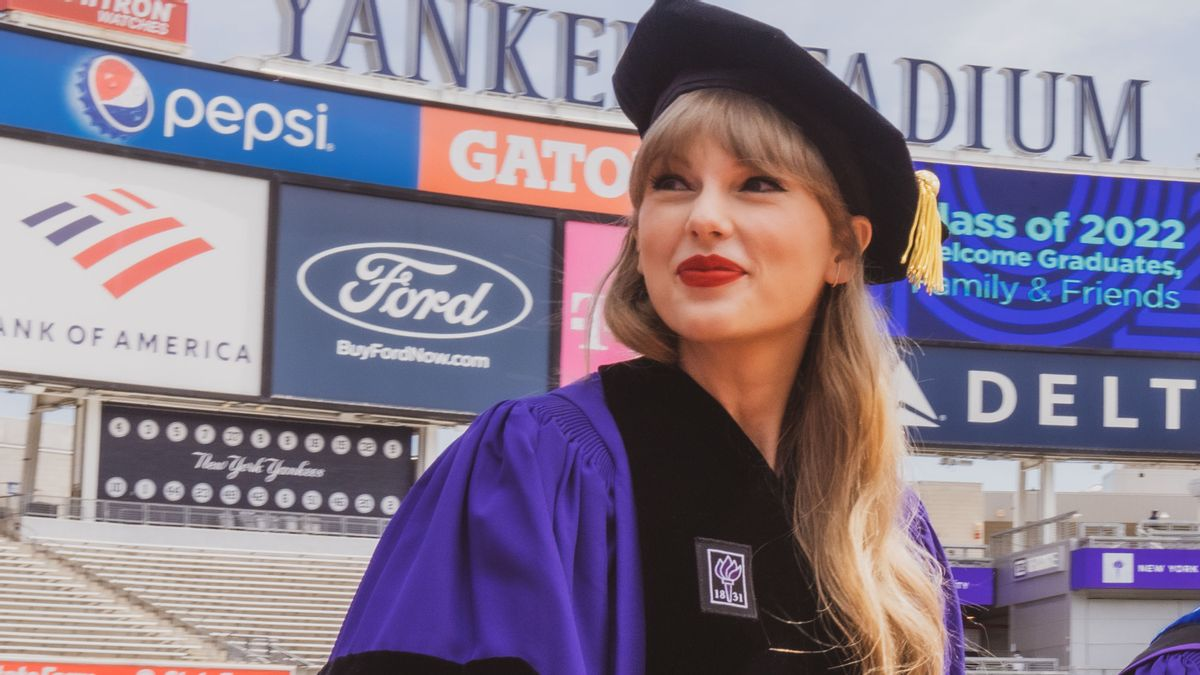

In [50]:
# 加载图像
image_path = 'taylorphoto.jpg'
image = cv2.imread(image_path)
image     # 此时的image是一个数组，格式为（高, 宽, 3），分别代表各像素的BGR值（注意不是RGB）

array([[[ 92,  94, 196],
        [ 95,  97, 199],
        [ 93,  92, 196],
        ...,
        [214, 208, 203],
        [214, 208, 203],
        [214, 208, 203]],

       [[ 94,  95, 199],
        [ 96,  97, 201],
        [ 94,  93, 197],
        ...,
        [214, 208, 203],
        [214, 208, 203],
        [214, 208, 203]],

       [[ 93,  96, 201],
        [ 95,  98, 203],
        [ 93,  93, 199],
        ...,
        [214, 208, 203],
        [214, 208, 203],
        [214, 208, 203]],

       ...,

       [[202, 209, 226],
        [198, 203, 224],
        [192, 196, 224],
        ...,
        [168,  59,  85],
        [171,  62,  88],
        [171,  64,  90]],

       [[194, 203, 223],
        [191, 199, 222],
        [189, 193, 221],
        ...,
        [167,  58,  84],
        [170,  61,  87],
        [170,  63,  89]],

       [[189, 197, 220],
        [186, 194, 217],
        [185, 189, 217],
        ...,
        [166,  57,  83],
        [169,  60,  86],
        [169,  62,  88]]

In [51]:
# 将BGR图像转化为HSV图像
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_image

array([[[  1, 135, 196],
        [  1, 133, 199],
        [  0, 135, 196],
        ...,
        [106,  13, 214],
        [106,  13, 214],
        [106,  13, 214]],

       [[  0, 135, 199],
        [  0, 133, 201],
        [  0, 135, 197],
        ...,
        [106,  13, 214],
        [106,  13, 214],
        [106,  13, 214]],

       [[  1, 137, 201],
        [  1, 136, 203],
        [  0, 136, 199],
        ...,
        [106,  13, 214],
        [106,  13, 214],
        [106,  13, 214]],

       ...,

       [[  9,  27, 226],
        [  6,  30, 224],
        [  4,  36, 224],
        ...,
        [127, 165, 168],
        [127, 163, 171],
        [127, 160, 171]],

       [[  9,  33, 223],
        [  8,  36, 222],
        [  4,  37, 221],
        ...,
        [127, 166, 167],
        [127, 164, 170],
        [127, 161, 170]],

       [[  8,  36, 220],
        [  8,  36, 217],
        [  4,  38, 217],
        ...,
        [127, 167, 166],
        [127, 164, 169],
        [127, 161, 169]]

In [52]:
# 计算整幅图像每个像素各个通道的均值
average_color_per_channel = np.mean(hsv_image, axis=(0, 1))
average_color_per_channel

array([ 89.11488025,  73.85408519, 156.60949877])

In [53]:
# 平均色相
average_hue = average_color_per_channel[0] / 180
average_hue * 180

89.11488024691359

In [54]:
# 平均纯度
average_saturation = average_color_per_channel[1] / 255
average_saturation * 255

73.85408518518518

In [55]:
# 平均明度
average_value = average_color_per_channel[2] / 255
average_value * 255

156.6094987654321

## 面部识别

这里我们使用OpenCV结合Dlib包做面部识别，Dlib能够识别特定顺序的面部锚点，我们可以通过这些锚点计算面部特征。锚点顺序如下：
- 1-17：沿着下颚线到颞部，这些点定义了面部的边界。
- 18-22：右眉毛的点，从内侧（鼻子一侧）到外侧。
- 23-27：左眉毛，类似地，也是从内侧到外侧。
- 28-31：鼻梁，从眉毛之间到鼻尖。
- 32-36：鼻子底部的点，围绕鼻孔。
- 37-42：右眼，包括眼角和睑缘。
- 43-48：左眼，同上。
- 49-60：嘴巴的外部轮廓，包括嘴角。
- 61-68：嘴巴的内部轮廓，即内唇。

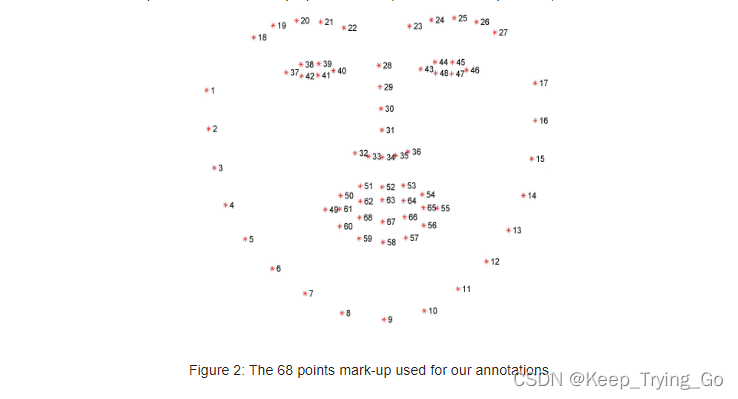

In [56]:
# 初始化dlib的人脸检测器并创建面部标志预测器
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # 加载模型文件

In [57]:
# 将图像转化为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 面部识别
faces = detector(gray, 1)

In [58]:
# 遍历检测到的人脸
for (i, rect) in enumerate(faces):
    # 确定面部区域的锚点，然后将面部标志坐标转换为numpy数组
    shape = predictor(gray, rect)
    shape = np.array([[p.x, p.y] for p in shape.parts()])
    # 遍历锚点坐标并将它们绘制在图像上
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

In [59]:
# 保存锚点结果
cv2.imwrite('output.jpg', image)

True

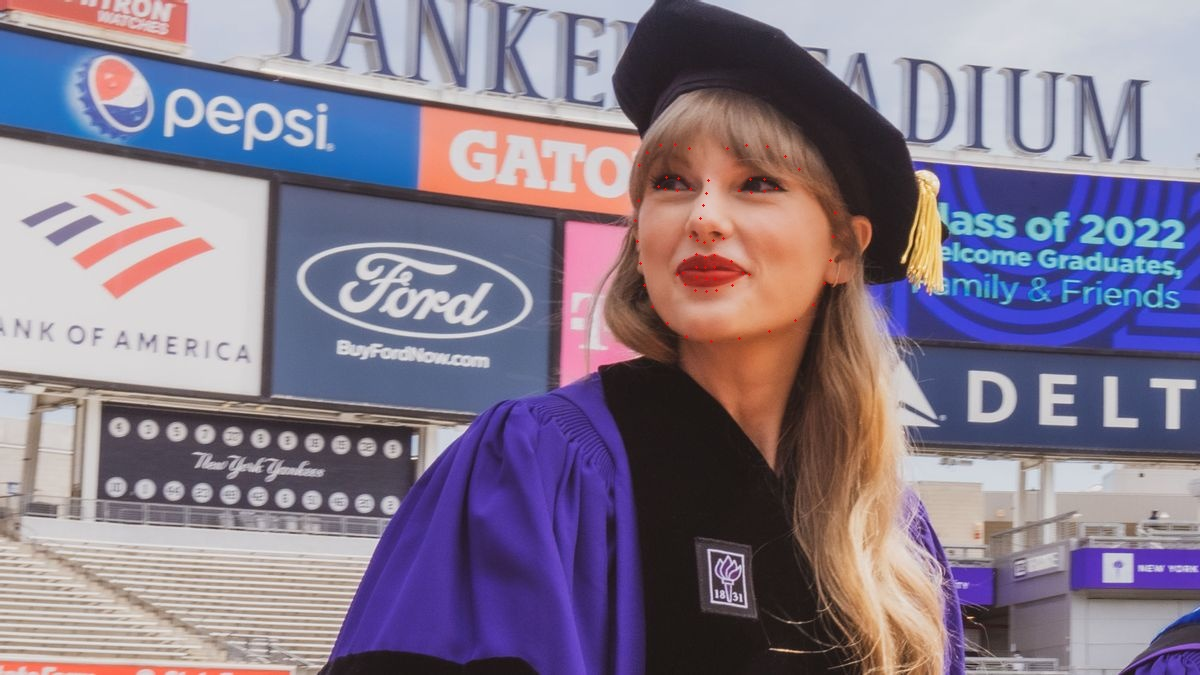

### 面部特征计算样例

In [45]:
# 定义欧氏距离函数计算两点间距离
def distance_between_points(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [60]:
# 注意：索引为实际面部锚点编号-1

# 眼距：左眼的索引39（右边缘）和右眼的索引42（左边缘）之间的距离
eye_distance = distance_between_points(shape[39], shape[42])

# 鼻长：鼻梁顶部索引27到鼻尖索引33的距离
nose_length = distance_between_points(shape[27], shape[33])

# 嘴宽：嘴角之间的距离，索引48（左嘴角）和索引54（右嘴角）
mouth_width = distance_between_points(shape[48], shape[54])

# 输出计算结果
eye_distance, nose_length, mouth_width

(49.01020301937138, 62.12889826803627, 72.0)

注意：跨图像间的绝对特征作比较没有意义，因为不同图像的分辨率不一样、人脸大小不一样、拍照角度不一样、人的表情也不一样，这些都会影响到我们对欧氏距离的测量。因此在实际应用中经常使用比值或比例（如眼距与嘴长的比例）来进行更稳定的比较。比值有助于消除由图片尺寸或面部尺寸带来的变化影响，因而可以更可靠地应用于生物特征识别与美学分析等。

------------------------------